In [1]:
#Import libraries
import tensorflow as tf
import numpy as np
import matplotlib

import os
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24})
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#get data from the shakespeare text file
f = open('shakespeare.txt').readlines()
f = [s for s in f if s != '\n']
f = [s.lower() for s in f]
f = [s.replace('\n','') for s in f]
f = [s[:-1] for s in f]

print (f[:10])

["a midsummer-night's drea", 'now , fair hippolyta , our nuptial hour', 'draws on apace : four happy days bring in', 'another moon ; but o ! methinks how slow', 'this old moon wanes ; she lingers my desires ', 'like to a step dame , or a dowager', "long withering out a young man's revenue ", 'four days will quickly steep themselves in night ', 'four nights will quickly dream away the time ', 'and then the moon , like to a silver bow']


In [3]:
#Process the data to only have strings that are long enough
MIN_LENGTH = 40
lengths = [len(s) for s in f]
strings = [f[i] for i in range(len(f)) if lengths[i] > MIN_LENGTH]
print (len(f))
print (len(strings))
print (strings[:10])

93166
53302
['draws on apace : four happy days bring in', 'this old moon wanes ; she lingers my desires ', "long withering out a young man's revenue ", 'four days will quickly steep themselves in night ', 'four nights will quickly dream away the time ', 'new-bent in heaven , shall behold the night', 'stir up the athenian youth to merriments ', 'awake the pert and nimble spirit of mirth ', 'with pomp , with triumph , and with revelling ', "thanks , good egeus : what's the news with thee "]


In [4]:
#Find the vocabulary by reducing the dataset to a sequence of characters
#and counting the characters
a = [c for s in strings for c in s]

vocab = {}
for c in a:
    if c not in vocab:
        vocab[c] = 1
    else:
        vocab[c] += 1

In [5]:
#Print the vocab to see what we get
print (vocab)
print (len(vocab))
letters = vocab.keys()
frequencies = vocab.values()
print (letters)
print (frequencies)
sorted_freqs = sorted(zip(letters,frequencies), key=lambda x: -x[1])

{'d': 93786, 'r': 144117, 'a': 175619, 'w': 61228, 's': 155556, ' ': 644173, 'o': 196181, 'n': 145423, 'p': 33571, 'c': 49401, 'e': 280647, ':': 5338, 'f': 51365, 'u': 80587, 'h': 164537, 'y': 59411, 'b': 36681, 'i': 151684, 'g': 43103, 't': 214208, 'l': 104017, 'm': 68261, ';': 9295, "'": 21470, 'v': 23963, 'q': 2018, 'k': 22886, '-': 3466, ',': 48797, '.': 7134, '?': 2481, 'j': 2551, 'x': 1618, '!': 4752, 'z': 684, '"': 2, '&': 5, '[': 19, ']': 18, '2': 1, '4': 1, '7': 1, '9': 1}
43
dict_keys(['d', 'r', 'a', 'w', 's', ' ', 'o', 'n', 'p', 'c', 'e', ':', 'f', 'u', 'h', 'y', 'b', 'i', 'g', 't', 'l', 'm', ';', "'", 'v', 'q', 'k', '-', ',', '.', '?', 'j', 'x', '!', 'z', '"', '&', '[', ']', '2', '4', '7', '9'])
dict_values([93786, 144117, 175619, 61228, 155556, 644173, 196181, 145423, 33571, 49401, 280647, 5338, 51365, 80587, 164537, 59411, 36681, 151684, 43103, 214208, 104017, 68261, 9295, 21470, 23963, 2018, 22886, 3466, 48797, 7134, 2481, 2551, 1618, 4752, 684, 2, 5, 19, 18, 1, 1, 1, 1]

In [6]:
#After sorting the vocab we can get our final vocab list
#We also create two maps to convert between letters and 
#numerical encodings
final_vocab = [s[0] for s in sorted_freqs]
print (final_vocab)

NUM_CHARS = len(final_vocab)+1
vocab_map = {}
num_map = {}
for i in range(len(final_vocab)):
    c = final_vocab[i]
    vocab_map[c] = i
    num_map[i] = c
print (vocab_map)
print (num_map)

[' ', 'e', 't', 'o', 'a', 'h', 's', 'i', 'n', 'r', 'l', 'd', 'u', 'm', 'w', 'y', 'f', 'c', ',', 'g', 'b', 'p', 'v', 'k', "'", ';', '.', ':', '!', '-', 'j', '?', 'q', 'x', 'z', '[', ']', '&', '"', '2', '4', '7', '9']
{' ': 0, 'e': 1, 't': 2, 'o': 3, 'a': 4, 'h': 5, 's': 6, 'i': 7, 'n': 8, 'r': 9, 'l': 10, 'd': 11, 'u': 12, 'm': 13, 'w': 14, 'y': 15, 'f': 16, 'c': 17, ',': 18, 'g': 19, 'b': 20, 'p': 21, 'v': 22, 'k': 23, "'": 24, ';': 25, '.': 26, ':': 27, '!': 28, '-': 29, 'j': 30, '?': 31, 'q': 32, 'x': 33, 'z': 34, '[': 35, ']': 36, '&': 37, '"': 38, '2': 39, '4': 40, '7': 41, '9': 42}
{0: ' ', 1: 'e', 2: 't', 3: 'o', 4: 'a', 5: 'h', 6: 's', 7: 'i', 8: 'n', 9: 'r', 10: 'l', 11: 'd', 12: 'u', 13: 'm', 14: 'w', 15: 'y', 16: 'f', 17: 'c', 18: ',', 19: 'g', 20: 'b', 21: 'p', 22: 'v', 23: 'k', 24: "'", 25: ';', 26: '.', 27: ':', 28: '!', 29: '-', 30: 'j', 31: '?', 32: 'q', 33: 'x', 34: 'z', 35: '[', 36: ']', 37: '&', 38: '"', 39: '2', 40: '4', 41: '7', 42: '9'}


In [7]:
#We can now build our training dataset by converting each string
#to a sequence of numbers
data_set = []
for i in range(len(strings)):
    s = strings[i]
    string_length = len(s)
    x = np.zeros((string_length))
    
    for j in range(len(s)):
        c = s[j]
        if c in vocab_map:
            char_pos = vocab_map[c]
        else:
            char_pos = NUM_CHARS-1
        x[j] = char_pos
        
    data_set.append(x)
    

In [8]:
#Define some convenience functions to build our network
def fully_connected(x, output_units=100, activation=tf.identity, std='variance',
                   scope='fc', reuse=False):
  """
  args:
      x, (tf tensor), tensor with shape (batch,width,height,channels)
      std, (float/string), std of weight initialization, 'xavier' for xavier
          initialization
      output_units,(int), number of output units for the layer
      activation, (tf function), tensorflow activation function, e.g. tf.nn.relu
      scope, (string), scope under which to store variables
      reuse, (boolean), whether we want to reuse variables that have already
          been created (i.e. reuse an earilier layer)
  returns:
      a, (tf tensor), the output of the fully_connected layer, has size
          (batch, output_units)
  """
  with tf.variable_scope(scope, reuse=reuse):
    s = x.get_shape().as_list()

    shape = [s[1], output_units]

    if std == 'variance':
      std = np.sqrt(2.0 / shape[0])

    W = tf.get_variable('W', shape=shape, initializer=tf.random_normal_initializer(0.0, std))
    b = tf.get_variable("b", shape=shape[1], initializer=tf.random_normal_initializer(0.0, std))

    h = tf.matmul(x, W) + b
    a = activation(h)
    return a
    
def get_batch(f,n=32, min_length=10):
    N = len(f)
    inds = np.random.choice(range(N),size=n, replace=False)
    mats = [f[i] for i in inds]
    vocab_length = mats[0].shape[0]
    
    X = np.zeros((n,min_length))
    Y = np.zeros((n,min_length))
    
    for i in range(n):
        mat = mats[i]
        length = mat.shape[0]
        
        start = np.random.randint(length-min_length)
        label_start = start+1
        end = start+min_length
        label_end = end+1
        
        X[i] = mat[start:end]
        Y[i] = mat[label_start:label_end]
        
    return X,Y

def rnn(x,h,hidden_size=100,activation=tf.nn.tanh,scope='RNN',reuse=False):
    s = x.get_shape().as_list()
    vocab_size = s[1]
    
    with tf.variable_scope(scope, reuse=reuse):
            Wxh = tf.get_variable('Wxh', [vocab_size, hidden_size])
            Whh = tf.get_variable('Whh', [hidden_size, hidden_size])
            Why = tf.get_variable('Why', [hidden_size, hidden_size])
            bh = tf.get_variable('bh', [hidden_size])
            by = tf.get_variable('by', [hidden_size])
    
    next_state = activation(tf.matmul(x, Wxh) + tf.matmul(h, Whh) + bh)
    yhat = tf.matmul(next_state,Why)+by
    return yhat,next_state

def rnn_multi(rnn_input, init_state, hidden_size=100, activation=tf.nn.tanh, scope='RNN'):
    outputs = []
    state = init_state
    reuse = False
    for i in range(len(rnn_input)):
            x = rnn_input[i]

            if i > 0: reuse=True
            output,state = rnn(x,state,hidden_size,activation,scope,reuse)
            outputs.append(output)
    return outputs,state


In [9]:
#Neural Network parameters
train_steps = 10000
batch_size = 32
learning_rate = 1e-3
lstm_size = 256
print_step = 500

init = 1e-2
#test get_batch
xb,yb = get_batch(data_set,batch_size,MIN_LENGTH)

print (xb.shape)
print (yb.shape)

(32, 40)
(32, 40)


In [10]:
#Construct tensorflow graph
x = tf.placeholder(shape=[None,MIN_LENGTH],dtype=tf.int32)
y = tf.placeholder(shape=[None,MIN_LENGTH],dtype=tf.int32)

x_oh = tf.one_hot(x, depth=NUM_CHARS)
y_oh = tf.one_hot(y, depth=NUM_CHARS)

#placeholders for the RNN hidden state
init_hidden = tf.placeholder(shape=[None,lstm_size],dtype=tf.float32)
final_hidden = tf.placeholder(shape=[None,NUM_CHARS],dtype=tf.float32)

x_list = tf.unstack(x_oh,axis=1)

rnn_outputs,final_state_1 = rnn_multi(x_list,init_hidden,lstm_size,scope='RNN1')

final_outputs, final_state_2 = rnn_multi(rnn_outputs, final_hidden, NUM_CHARS,scope='RNN_OUT')

out_mat = tf.stack(final_outputs,axis=1)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_mat,labels=y_oh))

In [11]:
#construct some additional ops for test time predictions
x_test = tf.placeholder(shape=[1],dtype=tf.int32)
x_test_oh = tf.one_hot(x_test,depth=NUM_CHARS)

test_out_1, test_state_1 = rnn(x_test_oh,init_hidden,lstm_size,scope='RNN1',reuse=True)
test_out, test_state = rnn(test_out_1,final_hidden,NUM_CHARS,scope='RNN_OUT',reuse=True)
test_out = tf.nn.softmax(test_out)
print (test_out)

Tensor("Softmax:0", shape=(?, 44), dtype=float32)


In [12]:
#Construct the optimizer and training operations
opt = tf.train.AdamOptimizer(learning_rate)
train = opt.minimize(loss)
init = tf.global_variables_initializer()

In [13]:
sess = tf.Session()
sess.run(init)

In [14]:
#Start the train loop
train_hist = []
val_hist = []

state_1 = np.zeros((batch_size,lstm_size))
state_2 = np.zeros((batch_size,NUM_CHARS))

for i in range(train_steps):
    xb,yb = get_batch(data_set,batch_size,MIN_LENGTH)

    l,_=sess.run([loss,train],{x:xb,y:yb,
            init_hidden:state_1,final_hidden:state_2})
    
    if i%print_step == 0:
        
        xb,yb = get_batch(data_set,batch_size,MIN_LENGTH)
        lval=sess.run(loss,{x:xb,y:yb,init_hidden:state_1, final_hidden:state_2})
        print ("iter: {} Train: {}, Val: {}".format(i,l,lval))
        train_hist.append(l)
        val_hist.append(lval)

iter: 0 Train: 3.8330445289611816, Val: 3.6277718544006348
iter: 1000 Train: 1.8491249084472656, Val: 1.7786028385162354
iter: 2000 Train: 1.738591194152832, Val: 1.7980737686157227
iter: 3000 Train: 1.7572300434112549, Val: 1.7320358753204346
iter: 4000 Train: 1.6024576425552368, Val: 1.6474533081054688
iter: 5000 Train: 1.619590401649475, Val: 1.7196182012557983
iter: 6000 Train: 1.7829986810684204, Val: 1.6041696071624756
iter: 7000 Train: 1.5785963535308838, Val: 1.6050710678100586
iter: 8000 Train: 1.6729999780654907, Val: 1.6195461750030518
iter: 9000 Train: 1.5281745195388794, Val: 1.557664155960083


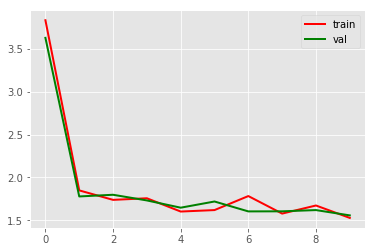

In [15]:
plt.figure()
plt.plot(train_hist, linewidth=2,color='r',label='train')
plt.plot(val_hist, linewidth=2,color='g',label='val')
plt.legend()
plt.show()

In [22]:
#Test the predictions
max_predictions = 75
input_string = 'the such '

input_length = len(input_string)
x_t = np.zeros((1,input_length))

for i in range(input_length):
    char = input_string[i]
    if char in vocab_map:
        char_index = vocab_map[char]
        x_t[0,i] = char_index
    else:
        x_t[0,i] = NUM_CHARS-1

state = np.zeros((1,lstm_size))
final_state = np.zeros((1,NUM_CHARS))

for i in range(input_length):
    x_input = x_t[0,i]
    x_input = x_input.reshape((1))

    prediction,state,final_state = sess.run([test_out,test_state_1,test_state],
                                {x_test:x_input,init_hidden:state,final_hidden:final_state})
test_predictions=[]    
for i in range(max_predictions):
    x_input = np.zeros((1))
    ind = np.argmax(prediction,axis=1)
    x_input[0] = ind
    prediction,state,final_state = sess.run([test_out,test_state_1,test_state],
                                {x_test:x_input,init_hidden:state,final_hidden:final_state})
    test_predictions.append(np.argmax(prediction,axis=1))
    
output_chars = [num_map[t[0]] for t in test_predictions]
output_string = input_string + ''.join(output_chars)
print (output_string)

the such he such the such the such the such the such the such the such the such the 
